In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
im = plt.imread('../data/raw/example_image/ISIC_0001769.jpg')
mask=plt.imread('../data/raw/example_segmentation/ISIC_0001769_segmentation.png')


3.545708406819518 %


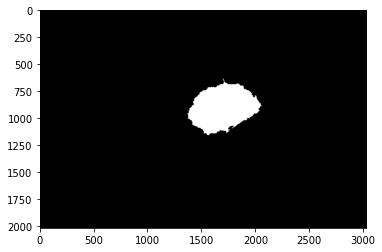

In [15]:
#Total size of the image
total = mask.shape[0] * mask.shape[1] 

#Size of mask only
area = np.sum(mask)

#As percentage
print(area/total*100, "%")

plt.imshow(mask, cmap='gray')

In [ ]:
//Jakob cell, its mine

import Image
img = Image.open(FILENAME)
img.size

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d3cba4d-030c-46c0-9c7d-8130179a7111' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>